# Глибоке навчання. Фреймворк Pytorch.

## Завдання

Використовуючи наведений в лекції датасет і код, створіть на основі двошарової нейромережі тришарову. Оцініть її похибку та точність визначення класів.

Після цього використайте для оцінки похибки **Mean Squared Error** (синтаксис – за посиланням), в якості оптимізатора – **Adam** (синтаксис – за посиланням). Порівняйте, чи змінилась похибка та точність.

## Розв'язок

In [69]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchviz

**Структура тришарової мережі**

In [70]:
nX, nH1, nH2, nY = 2, 5, 5, 1

In [71]:
model = nn.Sequential(
    nn.Linear(nX, nH1),
    nn.Sigmoid(),
    nn.Linear(nH1, nH2),
    nn.Sigmoid(),   
    nn.Linear(nH2, nY),
    nn.Sigmoid())


In [72]:
class ThreeLayersNet(nn.Module):
    def __init__(self, nX, nH1, nH2, nY):        
        super(ThreeLayersNet, self).__init__()     # конструктор
         
        self.fc1 = nn.Linear(nX, nH1)             # створення параметрів моделі
        self.fc2 = nn.Linear(nH1, nH2) 
        self.fc3 = nn.Linear(nH2, nY)             # у повнозв'язкових шарах
          
    def forward(self, x):                        # задаємо прямий прохід
        x = self.fc1(x)                          # вихід першого шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        x = self.fc2(x)                          # вихід другого шару
        x = nn.Sigmoid()(x) 
        x = self.fc3(x)                          # вихід третього шару
        x = nn.Sigmoid()(x)                      # сигмоїдна активація
        return x

**Генеруємо дані для нашої моделі**

In [73]:
X = torch.rand (1200, 2)                       
Y = (torch.sum((X - 0.5)**2, axis=1) < 0.1).float().view(-1,1)

**Візуалізуємо дані**

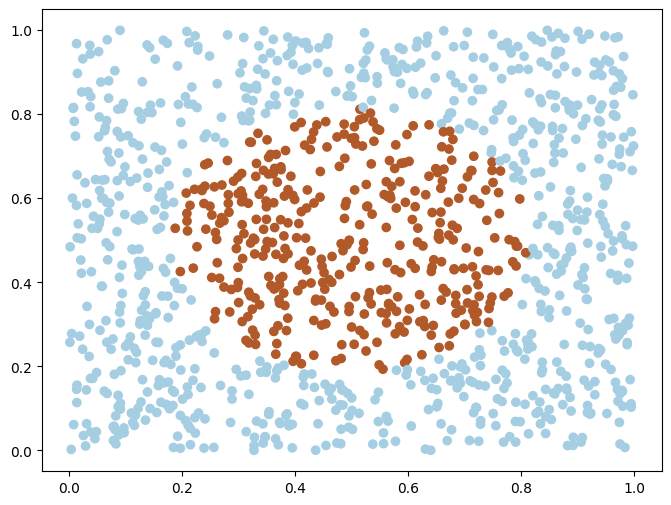

In [74]:
plt.figure (figsize=(8, 6))
plt.scatter(X.numpy()[:,0], X.numpy()[:,1], c=Y.numpy()[:,0],cmap=plt.cm.Paired) 
plt.show()

**Функція для навчання моделі**

In [75]:
def fit(model, X,Y, batch_size=100, train=True):    
      model.train(train)                                 
      sumL, sumA, numB = 0, 0, int( len(X)/batch_size ) 
       
      for i in range(0, numB*batch_size, batch_size):          
        xb = X[i: i+batch_size]                          # поточний батч
        yb = Y[i: i+batch_size]                          # тензори поточного батчу
        y = model(xb)                                    # пряме розповсюдження
        L = loss(y, yb)                                  # похибка
        if train:                                        # в режимі навчання
            optimizer.zero_grad()                        # обнуляємо градієнти,        
            L.backward()                                 # обчислюємо градієнти,            
            optimizer.step()                             # підганяємо параметри
        sumL += L.item()                                 # сумарна похибка
        sumA += (y.round() == yb).float().mean()         # точність визначення окремого класу
         
        return sumL/numB,  sumA/numB   

### Модель
#### з функцією втрат  Бінарна крос-ентропія або лог-лосс (Binary Cross-Enthropy, Log-loss) 
#### і оптимізатором  Стохастичний градієнтний спуск (Steep Gradient Descent, SGD)  

In [76]:
model_1 = ThreeLayersNet(2, 5, 5, 1)        # створення екземпляру класу
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.8)

In [77]:
# режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model_1, X,Y) )  

epochs = 1000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model_1, X, Y)                               # по всьому датасету
    
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0566 accuracy: 0.0608
epoch:     0 loss: 0.0566 accuracy: 0.0608
epoch:   100 loss: 0.0566 accuracy: 0.0608
epoch:   200 loss: 0.0566 accuracy: 0.0608
epoch:   300 loss: 0.0566 accuracy: 0.0608
epoch:   400 loss: 0.0566 accuracy: 0.0608
epoch:   500 loss: 0.0566 accuracy: 0.0608
epoch:   600 loss: 0.0566 accuracy: 0.0608
epoch:   700 loss: 0.0566 accuracy: 0.0608
epoch:   800 loss: 0.0566 accuracy: 0.0608
epoch:   900 loss: 0.0566 accuracy: 0.0608
epoch:   999 loss: 0.0566 accuracy: 0.0608


In [78]:
print(model_1)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


In [79]:
dict(model_1.named_parameters())

{'fc1.weight': Parameter containing:
 tensor([[-0.2397,  0.6846],
         [-0.3869,  0.0565],
         [-0.6628, -0.0257],
         [ 0.6976,  0.3882],
         [ 0.2301,  0.2622]], requires_grad=True),
 'fc1.bias': Parameter containing:
 tensor([ 0.3900,  0.1166, -0.6135,  0.5191, -0.1885], requires_grad=True),
 'fc2.weight': Parameter containing:
 tensor([[-0.4382, -0.3703,  0.1801,  0.0176,  0.4233],
         [-0.4159, -0.0294, -0.0333, -0.1337,  0.2672],
         [ 0.0130, -0.0848,  0.0721,  0.0699, -0.0769],
         [-0.3731, -0.4197, -0.2821,  0.4318,  0.1822],
         [ 0.0122, -0.1629,  0.2237, -0.1304,  0.1056]], requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([-0.2249, -0.2440, -0.2402, -0.0515, -0.2115], requires_grad=True),
 'fc3.weight': Parameter containing:
 tensor([[ 0.4054, -0.2694,  0.3930, -0.2599, -0.0924]], requires_grad=True),
 'fc3.bias': Parameter containing:
 tensor([-0.1371], requires_grad=True)}

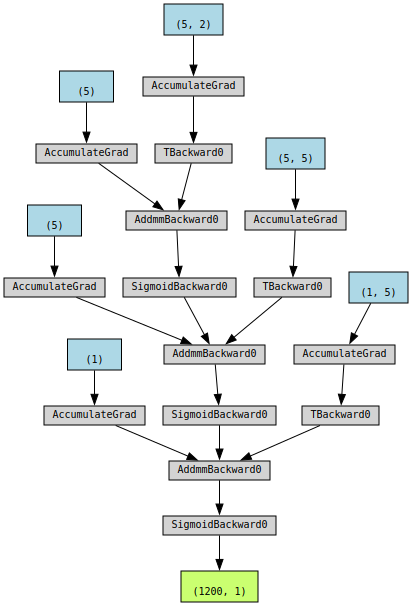

In [80]:
torchviz.make_dot(model_1(X), params = dict(model.named_parameters()))

### Модель
#### з функцією втрат  Середньоквадратична похибка (Mean Squared Error, MSE)
#### і оптимізатором  Адаптивна оцінка моментів (Adam)  

In [81]:
model_2 = ThreeLayersNet(2, 5, 5, 1)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08)

In [82]:
# режим оцінки моделі
print( "before:      loss: %.4f accuracy: %.4f" %  fit(model_2, X,Y) )
epochs = 1000                                            # число епох
for epoch in range(epochs):                              # епоха: прохід
    L,A = fit(model_2, X, Y)                               # по всьому датасету
    if epoch % 100 == 0 or epoch == epochs-1:                 
        print(f'epoch: {epoch:5d} loss: {L:.4f} accuracy: {A:.4f}' ) 

before:      loss: 0.0266 accuracy: 0.0225
epoch:     0 loss: 0.0266 accuracy: 0.0225
epoch:   100 loss: 0.0220 accuracy: 0.0225
epoch:   200 loss: 0.0197 accuracy: 0.0608
epoch:   300 loss: 0.0185 accuracy: 0.0608
epoch:   400 loss: 0.0177 accuracy: 0.0608
epoch:   500 loss: 0.0172 accuracy: 0.0608
epoch:   600 loss: 0.0169 accuracy: 0.0608
epoch:   700 loss: 0.0166 accuracy: 0.0608
epoch:   800 loss: 0.0165 accuracy: 0.0608
epoch:   900 loss: 0.0165 accuracy: 0.0608
epoch:   999 loss: 0.0164 accuracy: 0.0608


In [83]:
print(model_2)

ThreeLayersNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (fc3): Linear(in_features=5, out_features=1, bias=True)
)


In [84]:
dict(model_2.named_parameters())

{'fc1.weight': Parameter containing:
 tensor([[ 0.2006,  0.4583],
         [-0.1004, -0.4102],
         [-0.3852,  0.3317],
         [ 0.0245,  0.6832],
         [ 0.0869,  0.3531]], requires_grad=True),
 'fc1.bias': Parameter containing:
 tensor([ 0.4936,  0.7125, -0.1772,  0.8144,  0.5439], requires_grad=True),
 'fc2.weight': Parameter containing:
 tensor([[-0.2752, -0.5389,  0.0369, -0.3511, -0.4694],
         [-0.1391, -0.2802, -0.0236, -0.6603, -0.1584],
         [ 0.0512,  0.1343,  0.2839,  0.3075,  0.2144],
         [ 0.2839, -0.1374, -0.1733, -0.3365, -0.1399],
         [-0.4649, -0.5835, -0.0085,  0.0754, -0.0134]], requires_grad=True),
 'fc2.bias': Parameter containing:
 tensor([-0.6531, -0.6478, -0.0869,  0.1627, -0.6366], requires_grad=True),
 'fc3.weight': Parameter containing:
 tensor([[ 0.0147, -0.0441, -0.2951, -0.2434, -0.0133]], requires_grad=True),
 'fc3.bias': Parameter containing:
 tensor([-0.6321], requires_grad=True)}

## Висновок

**Тришарова нейромережа з функцією втрат - Бінарна крос-ентропія або лог-лосс (Binary Cross-Enthropy, Log-loss) і оптимізатором Стохастичний градієнтний спуск (Steep Gradient Descent, SGD)**

epoch:   999 loss: 0.0566 accuracy: 0.0608

**Тришарова нейромережа з функцією втрат - Середньоквадратична похибка (Mean Squared Error, MSE) і оптимізатором Адаптивна оцінка моментів (Adam)**

epoch:   999 loss: 0.0164 accuracy: 0.0608           

При використанні різних функцій втрат і оптимізаторів ми отримали приблизно однакові результати.